## Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab
import math

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



## Loading Data

In [2]:
datasheet = pd.read_excel('kc_house_data.xlsx')
datasheet.fillna(0)

#seting colum
datasheet.index = datasheet['yr_built']
datasheet.drop('yr_built', axis = 1)

#removing the id
datasheet.drop('id', axis = 1)

#seting datatype


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
yr_built,,,,,,,,,,,,,,,,,,,,
1955,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1951,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1933,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
1965,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1987,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
2014,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
2009,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [3]:
#chaning the date
list_date = list(datasheet.date)
year = []
day = []
month = []

contador = 0
while contador < len(list_date):
    list_date[contador] = list_date[contador].replace('T','')
    list_date[contador] = list_date[contador][0:8]
    
    year.append(list_date[contador][0:4])
    day.append(list_date[contador][6:8])
    month.append(list_date[contador][4:6])
    
    contador = contador + 1
    
# remover de 8 a 13
datasheet.date = list_date
datasheet['day'] = day
datasheet['month'] = month
datasheet['year'] = year

In [4]:
#droping the date
cleaned_datasheet = datasheet.drop('date', axis = 1)

In [5]:
cleaned_datasheet

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
yr_built,,,,,,,,,,,,,,,,,,,,,
1955,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,13,10,2014
1951,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,09,12,2014
1933,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,25,02,2015
1965,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,09,12,2014
1987,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,18,02,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,263000018,360000,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,21,05,2014
2014,6600060120,400000,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,23,02,2015
2009,1523300141,402101,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,23,06,2014


In [6]:
pd.set_option('use_inf_as_na', True)
cleaned_datasheet = cleaned_datasheet.dropna()

0.5251375054139615

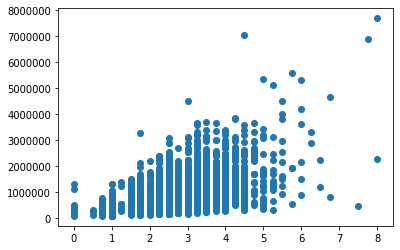

In [7]:
plt.scatter(cleaned_datasheet.bathrooms,cleaned_datasheet.price)
cleaned_datasheet.bathrooms.corr(cleaned_datasheet.price)

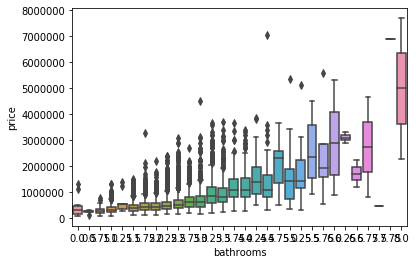

In [8]:
sns.boxplot(x = "bathrooms", y = "price", data = cleaned_datasheet)

0.3083495981456382

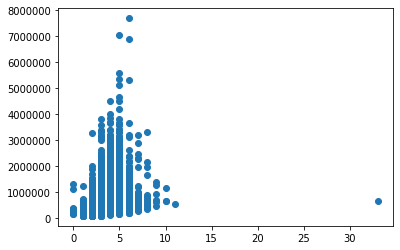

In [9]:
plt.scatter(cleaned_datasheet.bedrooms,cleaned_datasheet.price)
cleaned_datasheet.bedrooms.corr(cleaned_datasheet.price)

0.7020350546118004

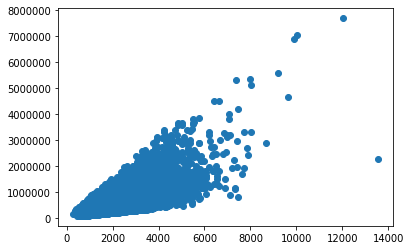

In [10]:
plt.scatter(cleaned_datasheet.sqft_living, cleaned_datasheet.price)
cleaned_datasheet.sqft_living.corr(cleaned_datasheet.price)

0.25679388755071847

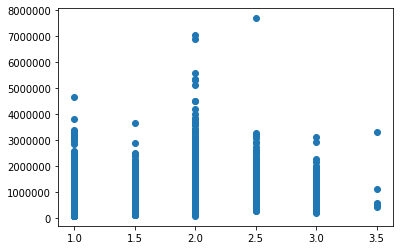

In [11]:
plt.scatter(cleaned_datasheet.floors,cleaned_datasheet.price)
cleaned_datasheet.floors.corr(cleaned_datasheet.price)

0.6055672983560781

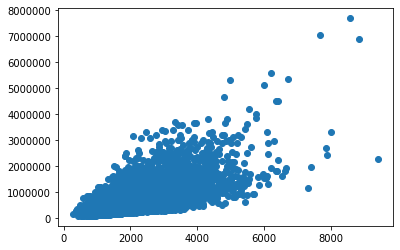

In [12]:
plt.scatter(cleaned_datasheet.sqft_above, cleaned_datasheet.price)
cleaned_datasheet.sqft_above.corr(cleaned_datasheet.price)

0.3238160207119834

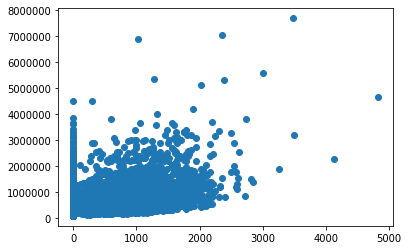

In [13]:
plt.scatter(cleaned_datasheet.sqft_basement, cleaned_datasheet.price)
cleaned_datasheet.sqft_basement.corr(cleaned_datasheet.price)

0.05401153149479271

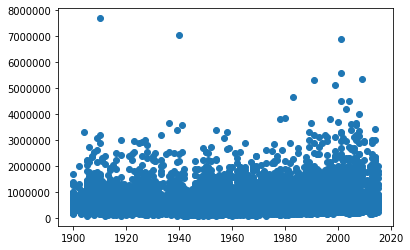

In [14]:
plt.scatter(cleaned_datasheet.yr_built, cleaned_datasheet.price)
cleaned_datasheet.yr_built.corr(cleaned_datasheet.price)

In [15]:
#plt.scatter(cleaned_datasheet.yr_renovated, cleaned_datasheet.price)
#cleaned_datasheet.yr_renovated.corr(cleaned_datasheet.price)

In [16]:
#Tirar esse gráfico

0.6674342560202366

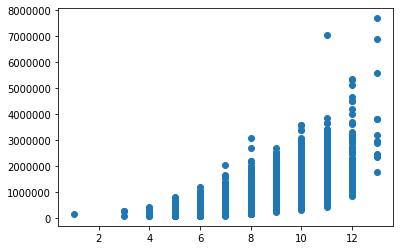

In [17]:
plt.scatter(cleaned_datasheet.grade, cleaned_datasheet.price)
cleaned_datasheet.grade.corr(cleaned_datasheet.price)

In [18]:
#seaborn boxplot

0.30700347999521854

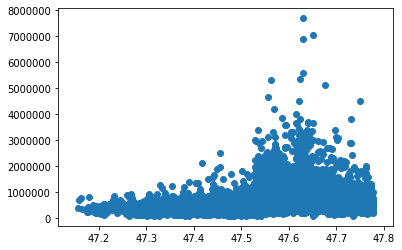

In [19]:
plt.scatter(cleaned_datasheet.lat,cleaned_datasheet.price)
cleaned_datasheet.lat.corr(cleaned_datasheet.price)

0.021626241039306694

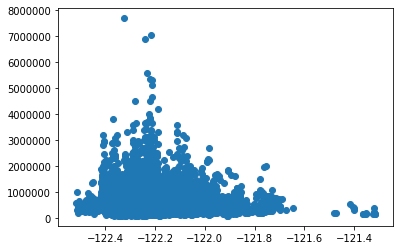

In [20]:
plt.scatter(cleaned_datasheet.long,cleaned_datasheet.price)
cleaned_datasheet.long.corr(cleaned_datasheet.price)
#matar esse

0.7020350546118004

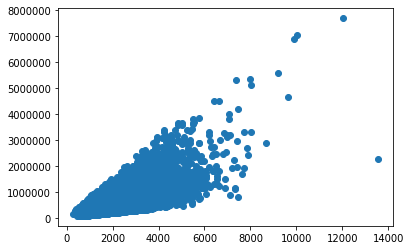

In [21]:
plt.scatter(cleaned_datasheet.sqft_living, cleaned_datasheet.price)
cleaned_datasheet.sqft_living.corr(cleaned_datasheet.price)

0.08244715251948591

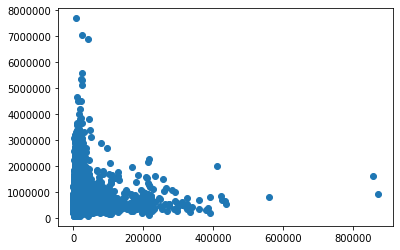

In [22]:
plt.scatter(cleaned_datasheet.sqft_lot15, cleaned_datasheet.price)
cleaned_datasheet.sqft_lot15.corr(cleaned_datasheet.price)
#matar esse

In [23]:
cleaned_datasheet.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x22091d4ea88>,
 'caps': [<matplotlib.lines.Line2D at 0x22091d4e408>,
 'boxes': [<matplotlib.lines.Line2D at 0x22091c9e1c8>],
 'medians': [<matplotlib.lines.Line2D at 0x22091df4bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22091df4988>],
 'means': []}

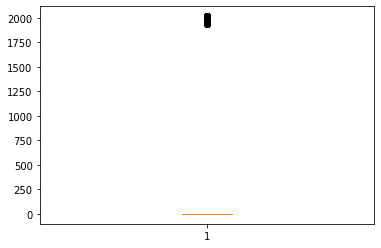

In [24]:
plt.boxplot(cleaned_datasheet.yr_renovated)

In [25]:
yr_built = cleaned_datasheet.yr_built
bedrooms = cleaned_datasheet.bedrooms
bathrooms = cleaned_datasheet.bathrooms
sq_living = cleaned_datasheet.sqft_living
floors = cleaned_datasheet.floors
condition = cleaned_datasheet.condition
yr_renovation = cleaned_datasheet.yr_renovated

In [26]:
#x = [yr_built, bedrooms, bathrooms, floors, condition, yr_renovation]
#x = yr_built
x = cleaned_datasheet.loc[:,["bathrooms","bedrooms","sqft_living","floors","waterfront","view","condition","grade", "sqft_above", "sqft_basement", "yr_built", "lat", "long"]]
y = cleaned_datasheet.price

In [27]:
x.dtypes

bathrooms        float64
bedrooms           int64
sqft_living        int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
lat              float64
long             float64
dtype: object

In [28]:
x.isna().sum()

bathrooms        0
bedrooms         0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
dtype: int64

In [29]:
xc = sm.add_constant(x)
model = sm.OLS(y, xc)
results = model.fit()
results.summary()

C:\Insper\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     4077.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:48:54   Log-Likelihood:            -2.9482e+05
No. Observations:               21613   AIC:                         5.897e+05
Df Residuals:                   21600   BIC:                         5.898e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.504e+07   1.53e+06    -22.913      0.000    -3.8e+07    -3.2e+07
bathrooms      4.434e+04   3252.732     13.633      0.000     3.8e+04    5.07e+04
bedrooms      -3.388e+04   1899.098    -17.838      0.000   -3.76e+04   -3.02e+04
sqft_living     113.5806      2.139     53.102      0.000     109.388     117.773
floors         -514.9361   3573.861     -0.144      0.885   -7519.967    6490.095
waterfront      5.89e+05   1.75e+04     33.673      0.000    5.55e+05    6.23e+05
view           5.193e+04   2124.870     24.439      0.000    4.78e+04    5.61e+04
condition       2.82e+04   2324.381     12.134      0.000    2.36e+04    3.28e+04
grade          1.026e+05   2078.156     49.394      0.000    9.86e+04    1.07e+05
sqft_above       75.1244      2.146     35.000      0.000      70.917      79.332
sqft_basement    38.4563      2.670     14.404      0.000      33.223      43.689
yr_built      -2589.3148     68.897    -37.582      0.000   -2724.358   -2454.271
lat            5.632e+05   1.05e+04     53.489      0.000    5.43e+05    5.84e+05
long          -1.034e+05   1.15e+04     -8.996      0.000   -1.26e+05   -8.09e+04
==============================================================================
Omnibus:                    18258.724   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1750674.533
Skew:                           3.545   Prob(JB):                         0.00
Kurtosis:                      46.517   Cond. No.                     1.60e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
lista_data = ["bathrooms","bedrooms","sqft_living","floors","waterfront","view","condition","grade", "sqft_above", "sqft_basement", "yr_built", "lat", "long"]

In [65]:
#X_train, X_test, Y_train, Y_test = train_test_split(cleaned_datasheet.loc[:,lista_data], cleaned_datasheet.price, train_size =.7)
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_datasheet, cleaned_datasheet.price, train_size =.7)

In [66]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(15129, 23) (6484, 23) (15129,) (6484,)


In [67]:
linreg = LinearRegression()

In [68]:
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
y_pred = linreg.predict(X_test)
y_pred 

array([ 506400.,  510000.,  105000., ...,  260000., 1000000.,  335000.])

In [71]:
Y_test / 1000

yr_built
1989     506.4
1954     510.0
1959     105.0
1972     510.0
1940     650.0
         ...  
1955     453.0
1925     150.0
1962     260.0
1912    1000.0
2009     335.0
Name: price, Length: 6484, dtype: float64

In [72]:
pd.Series(y_pred / 1000)

0        506.4
1        510.0
2        105.0
3        510.0
4        650.0
         ...  
6479     453.0
6480     150.0
6481     260.0
6482    1000.0
6483     335.0
Length: 6484, dtype: float64

In [70]:
np.mean((Y_test - y_pred)**2) #mean squared error

1.546716583830338e-19

In [84]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, average_precision_score

In [85]:
mean_squared_error(Y_test, y_pred)

1.546716583830338e-19

In [86]:
r2_score(Y_test, y_pred)

1.0

In [87]:
mean_absolute_error(Y_test, y_pred)

2.533097038726925e-10

In [90]:
#average_precision_score(Y_test, y_pred)

In [91]:
from sklearn.ensemble import RandomForestRegressor 

In [92]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [94]:
regressor.fit(Y_test, y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[ 506400.  510000.  105000. ...  260000. 1000000.  335000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.